# Import

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show

%matplotlib inline

---

# TOC

- [Demo-1](#Demo-1)
- [Demo-2](#Demo-2)
    - Dynamic plots with Bokeh
    - Save File

---

# Demo-1

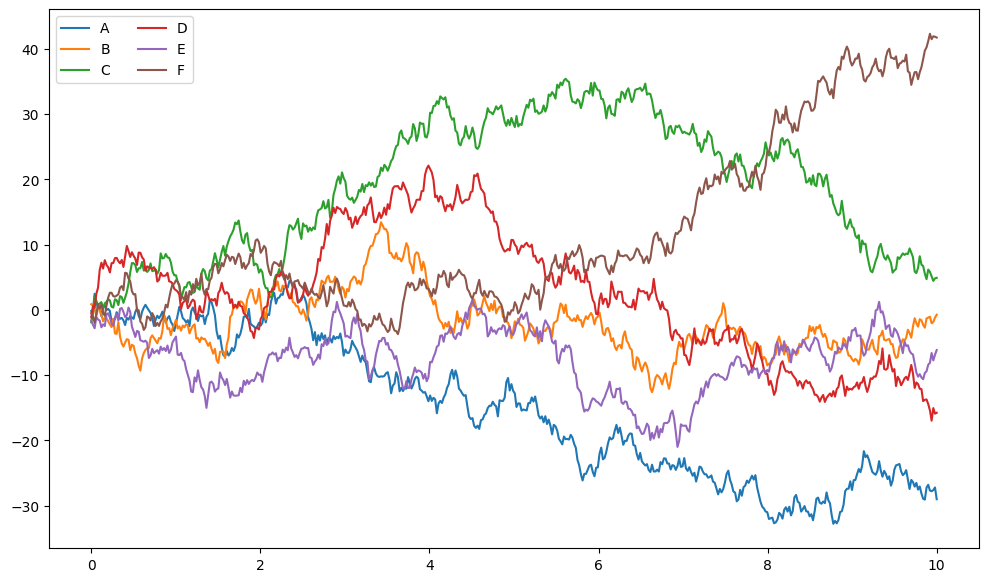

In [27]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc="upper left")

---

# Demo-2
- Working with code

In [28]:
# https://api.kraken.com/0/public/OHLC?pair=XBTUSD&interval=60&since=1704305938
def get_historic_price(symbol, after="2018-09-01"):
    url = "https://api.kraken.com/0/public/OHLC"
    pair = f"{symbol.upper()}USD"  # XBTUSD when symbol='xbt' for example

    resp = requests.get(
        url,
        params={
            "pair": pair,
            "interval": 60,
            "since": str(int(pd.Timestamp(after).timestamp())),
        },
    )
    resp.raise_for_status()

    data = resp.json()

    # print(data["result"].keys())

    results_key = [k for k in data["result"].keys() if k != "last"][0]

    # print(results_key)

    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count) in data["result"][
            results_key
        ]
    ]
    df = pd.DataFrame(
        results,
        columns=[
            "CloseTime",
            "OpenPrice",
            "HighPrice",
            "LowPrice",
            "ClosePrice",
            "Volume",
        ],
    )
    df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")
    df.set_index("CloseTime", inplace=True)
    return df

In [29]:
last_week = pd.Timestamp.now() - pd.offsets.Day(7)
last_week

Timestamp('2024-01-04 20:50:20.903221')

In [30]:
btc = get_historic_price("btc", after=last_week)
eth = get_historic_price("eth", after=last_week)

In [31]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-01-04 21:00:00,44187.6,44513.0,44187.6,44476.1,169.321650
2024-01-04 22:00:00,44476.1,44784.9,44250.1,44372.3,247.771258
2024-01-04 23:00:00,44372.4,44399.0,44119.8,44211.9,86.470443
2024-01-05 00:00:00,44210.0,44277.2,44038.2,44275.1,73.312344
2024-01-05 01:00:00,44275.1,44296.9,42480.0,43415.7,669.539931


In [32]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2024-01-04 21:00:00 to 2024-01-11 12:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   160 non-null    float64
 1   HighPrice   160 non-null    float64
 2   LowPrice    160 non-null    float64
 3   ClosePrice  160 non-null    float64
 4   Volume      160 non-null    float64
dtypes: float64(5)
memory usage: 7.5 KB


<Axes: xlabel='CloseTime'>

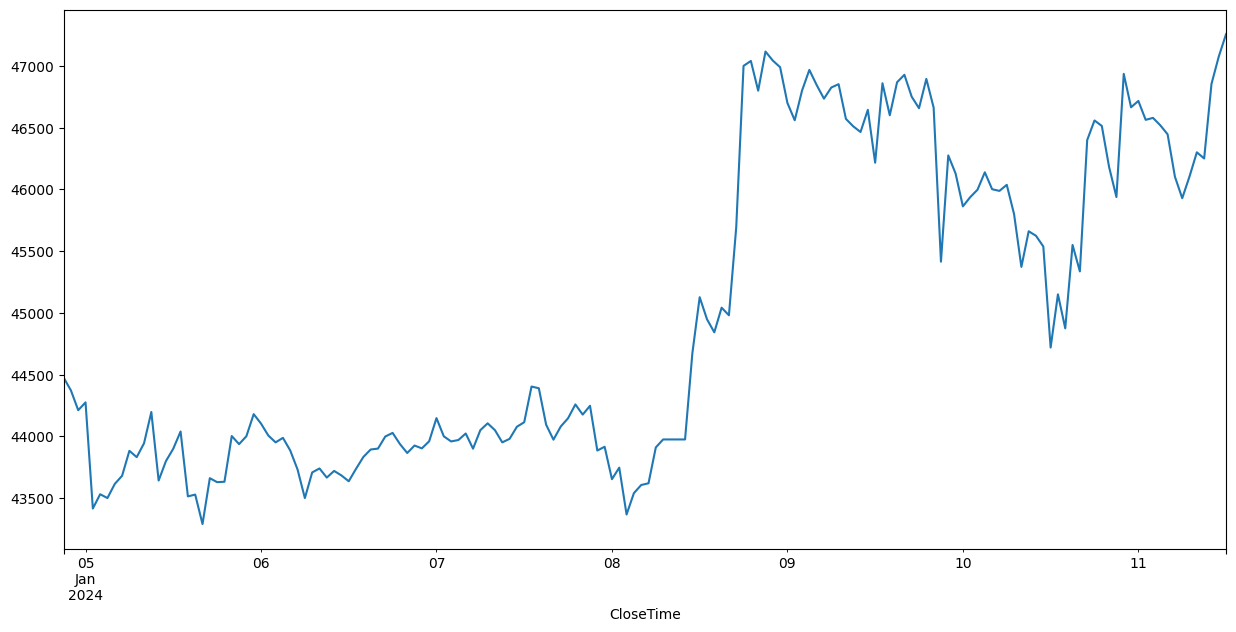

In [33]:
btc["ClosePrice"].plot(figsize=(15, 7))

In [34]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-01-04 21:00:00,2276.72,2289.21,2272.82,2274.61,1242.499583
2024-01-04 22:00:00,2274.61,2288.87,2265.75,2271.09,612.960497
2024-01-04 23:00:00,2271.09,2277.36,2268.70,2268.70,317.095828
2024-01-05 00:00:00,2269.33,2277.56,2263.32,2270.49,730.336812
2024-01-05 01:00:00,2270.50,2271.47,2217.26,2240.47,1102.032167


<Axes: xlabel='CloseTime'>

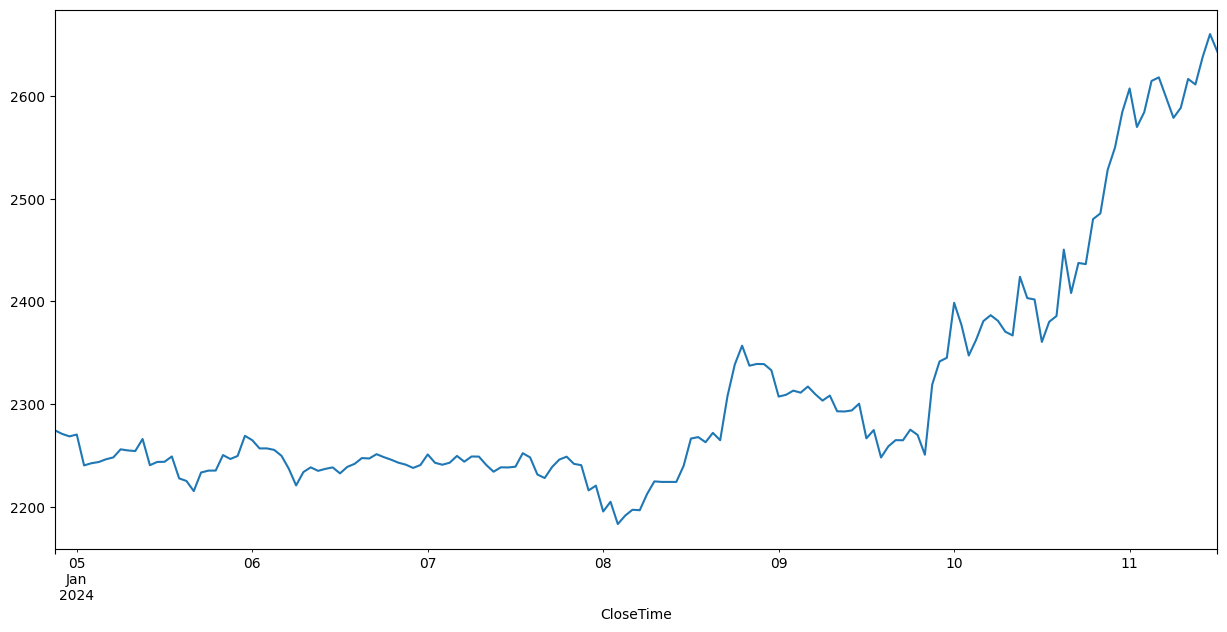

In [35]:
eth["ClosePrice"].plot(figsize=(15, 7))

## Dynamic plots with Bokeh

In [36]:
output_notebook()

Loading BokehJS ...

In [37]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Price"

p1.line(btc.index, btc["ClosePrice"], color="#f2a900", legend_label="Bitcoin")
# p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

## Save File
- Exporting Excel

In [38]:
writer = pd.ExcelWriter("../../../datasets/xlsx_datasets/cryptos.xlsx")

btc.to_excel(writer, sheet_name="Bitcoin")
eth.to_excel(writer, sheet_name="Ether")

writer._save()